In [0]:
# Importing dependencies
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Defining the Model**

In [0]:
# defining the Sigmoid Activation Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# derivative of Sigmoid Function for backpropagation
def derivatives_sigmoid(x):
    return x * (1 - x)

# defining the neuralnet model
class IrisNeuralNet():

    def fit(self, X, y, epoch = 50000, lr = 0.005):

      # initializing the variables
      epoch = 50000 # number of training iterations
      lr = 0.005 # learning rate
      inputlayer_neurons = X.shape[1] # number of features in data set
      hiddenlayer1_neurons = 7 # number of hidden layers neurons 
      hiddenlayer2_neurons = 4 # number of hidden layers neurons 
      output_neurons = 1 # number of neurons at output layer

      # initializing weight and bias
      self.wh1=np.random.uniform(size=(inputlayer_neurons,hiddenlayer1_neurons))
      self.bh1=np.random.uniform(size=(1,hiddenlayer1_neurons))
      self.wh2=np.random.uniform(size=(hiddenlayer1_neurons,hiddenlayer2_neurons))
      self.bh2=np.random.uniform(size=(1,hiddenlayer2_neurons))
      self.wout=np.random.uniform(size=(hiddenlayer2_neurons,output_neurons))
      self.bout=np.random.uniform(size=(1,output_neurons))


      # training the model
      for i in range(epoch):

          #Forward Propogation
          hidden_layer_1_input_raw = np.dot(X, self.wh1)
          hidden_layer_1_input = hidden_layer_1_input_raw + self.bh1
          hiddenlayer_1_activations = sigmoid(hidden_layer_1_input)
          hiddenlayer_2_input_raw = np.dot(hiddenlayer_1_activations, self.wh2)
          hiddenlayer_2_input = hiddenlayer_2_input_raw + self.bh2
          hiddenlayer_2_activations = sigmoid(hiddenlayer_2_input)
          output_layer_input_raw = np.dot(hiddenlayer_2_activations, self.wout)
          output_layer_input = output_layer_input_raw + self.bout
          output = sigmoid(output_layer_input)

          #Backpropagation using gradient descent
          output_error = y-output
          slope_output_layer = derivatives_sigmoid(output)
          d_output = output_error * slope_output_layer
          error_at_hidden_layer_2 = d_output.dot(self.wout.T)
          slope_hidden_layer_2 = derivatives_sigmoid(hiddenlayer_2_activations)
          d_hiddenlayer_2 = error_at_hidden_layer_2 * slope_hidden_layer_2
          self.wout += hiddenlayer_2_activations.T.dot(d_output) *lr
          self.bout += np.sum(d_output, axis=0,keepdims=True) *lr
          error_at_hidden_layer_1 = d_hiddenlayer_2.dot(self.wh2.T)
          slope_hidden_layer_1 = derivatives_sigmoid(hiddenlayer_1_activations)
          d_hiddenlayer_1 = error_at_hidden_layer_1 * slope_hidden_layer_1
          self.wh2 += d_hiddenlayer_1.T.dot(d_hiddenlayer_2) *lr
          self.bh2 += np.sum(d_hiddenlayer_2, axis=0,keepdims=True) *lr
          self.wh1 += X.T.dot(d_hiddenlayer_1) *lr
          self.bh1 += np.sum(d_hiddenlayer_1, axis=0,keepdims=True) *lr


    # for predicting the test_data
    def predict(self, test_data):
          input_raw = np.dot(test_data, self.wh1)
          input_ = input_raw + self.bh1
          layer_1_activation = sigmoid(input_)
          layer_2_input_raw = np.dot(layer_1_activation, self.wh2)
          layer_2_input = layer_2_input_raw + self.bh2
          layer_2_activation = sigmoid(layer_2_input)
          output_input_raw = np.dot(layer_2_activation, self.wout)
          output_input= output_input_raw + self.bout
          prediction = sigmoid(output_input)

          return prediction


**Loading and Preprocessing the input**

In [0]:
# loading the Data
iris = load_iris()

In [0]:
# train-test split 
train_data, test_data, train_label, test_label = train_test_split(iris.data, iris.target, test_size = 0.2)

In [0]:
# preprocessing the input
train_label = train_label.reshape(train_label.shape[0], 1)
test_label = test_label.reshape(test_label.shape[0], 1)

In [0]:
# Normalizing the input
train_label =  train_label/2.
test_label = test_label/2.

**Training the Model**

In [0]:
# training the model
model = IrisNeuralNet()
model.fit(train_data, train_label)

**Predicted Results from the Model**

In [0]:
# prediction using the trained model
prediction = classifier.predict(test_data)

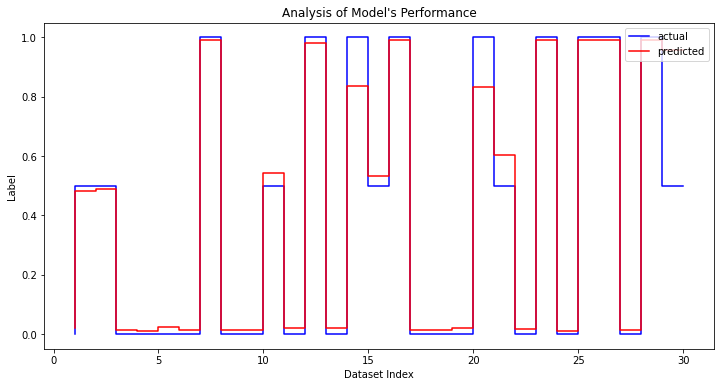

In [102]:
plt.figure(figsize=(12,6))
plt.title("Analysis of Model's Performance") 
plt.xlabel("Dataset Index") 
plt.ylabel("Label")
plt.step([i for i in range(1, test_label.shape[0]+1)], test_label, "b", label="actual")
plt.step([i for i in range(1, test_label.shape[0]+1)], prediction, "r", label="predicted")
plt.legend(loc=1)
plt.show()